## Car Price Prediction using multiple algorithms

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv(r'C:\Users\Asus\Desktop\datasets\Car Price Prediction\CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.shape

(205, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
data.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

<AxesSubplot:>

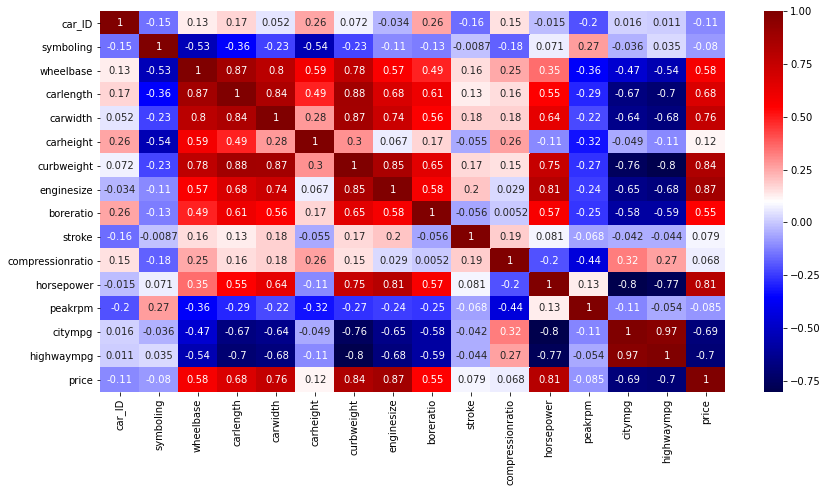

In [8]:
data_corr = data.corr()
plt.figure(figsize = (14,7))
sns.heatmap(data_corr, annot = True, cmap = "seismic")

In [9]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [10]:
CompanyName = data['CarName'].apply(lambda x: x.split(' ')[0])
data.insert(3,"CompanyName", CompanyName)
data.drop(['CarName', 'car_ID'], axis = 1, inplace = True)
data.head(5)

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [12]:
data['CompanyName'] = data['CompanyName'].str.lower()

def change(a,b):
    data['CompanyName'].replace(a,b,inplace = True)
    
change('maxda', 'mazda')
change('porcshce','porsche')
change('toyouta', 'toyota')
change('vokswagen', 'volkswagen')
change('vw', 'volkswagen')

In [13]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Data Visualization

Text(0.5, 1.0, 'Car Price Distribution')

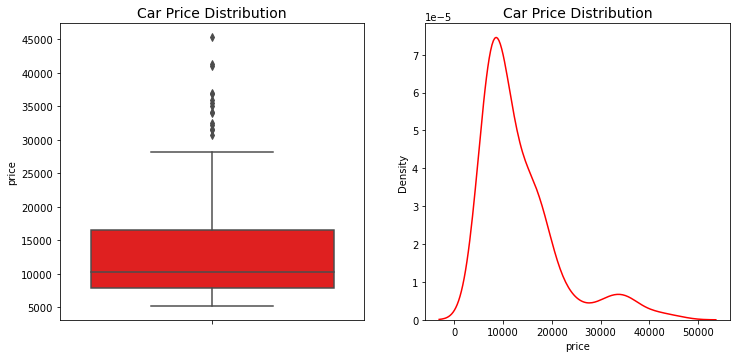

In [14]:
plt.figure(figsize = (12,12))

plt.subplot(2,2,1)
sns.boxplot(y = data.price, color = 'red')
plt.title('Car Price Distribution', fontsize = 14)

plt.subplot(2,2,2)
sns.kdeplot(x = data.price,  color = 'red')
plt.title('Car Price Distribution', fontsize = 14)

Inferences:

1. The plot seems to be right skewed.
2. The data points are spread out from the mean with around 80% of the data points are below 18,000 and almost 20% of data points are between 18,000 and 45,000.

Text(0.5, 1.0, 'Brands')

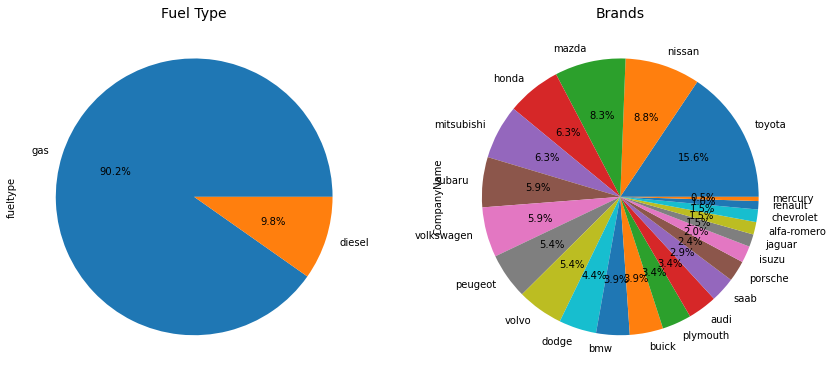

In [15]:
plt.figure(figsize = (14,14))
plt.subplot(2,2,1)
data['fueltype'].value_counts().plot.pie(autopct = "%1.1f%%")
plt.title('Fuel Type', fontsize = 14)

plt.subplot(2,2,2)
data['CompanyName'].value_counts().plot.pie(autopct = "%1.1f%%")
plt.title('Brands', fontsize = 14)

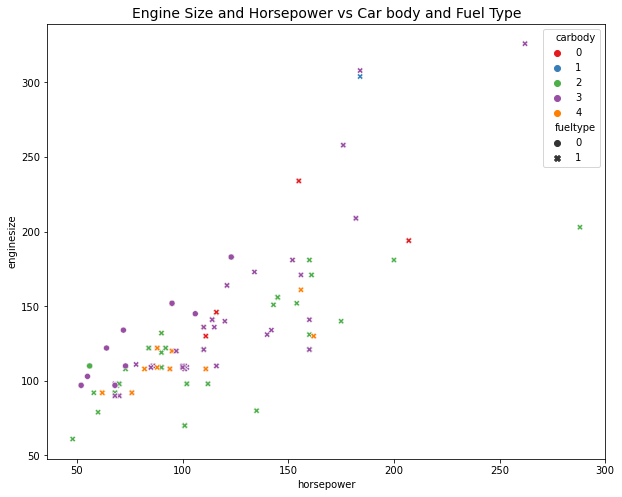

In [351]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'horsepower', y = 'enginesize', data = data, hue = 'carbody', style = 'fueltype', palette = 'Set1')
plt.title('Engine Size and Horsepower vs Car body and Fuel Type', size = 14)
plt.show()

Inferences:

1. I see more sedans and hatchbacks and I can hardly see convertibles and hardtops.
2. Most of them have gas fuel instead of diesel.
3. Diesel cars seem to have lower horsepower.

<AxesSubplot:title={'center':'Symboling units sold'}, xlabel='symboling', ylabel='count'>

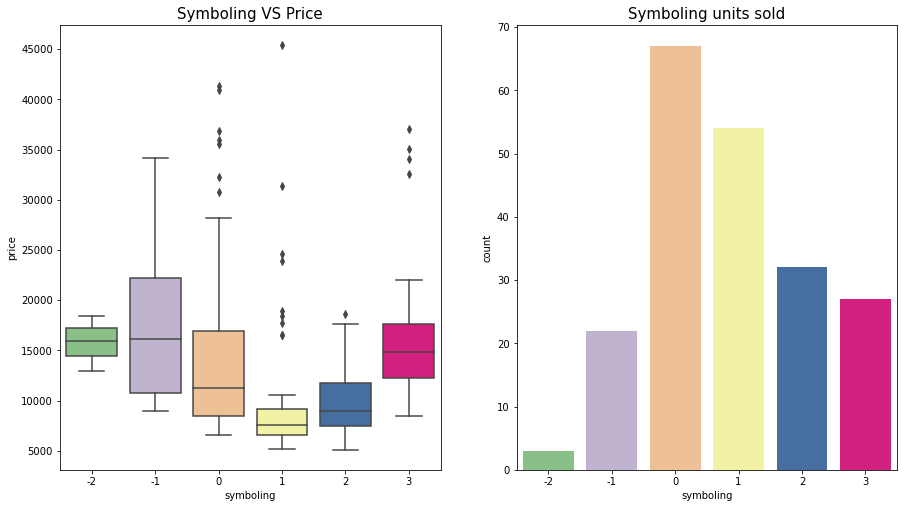

In [17]:
plt.figure(figsize = (15,18))
plt.subplot(2,2,1)
plt.title('Symboling VS Price', fontsize  = 15)
sns.boxplot(y = data.price, x = data.symboling, palette = 'Accent')

plt.subplot(2,2,2)
plt.title('Symboling units sold', fontsize = 15)
sns.countplot(x="symboling",data=data, palette = 'Accent')


Inferences:

1. The -1 symboling has the highest price range among all, and 1 symboling is priced low. But at the same time, a car with 1 symboling was sold at the highest price in the dataset.
2. Cars with 0 and 1 symboling are sold the most.

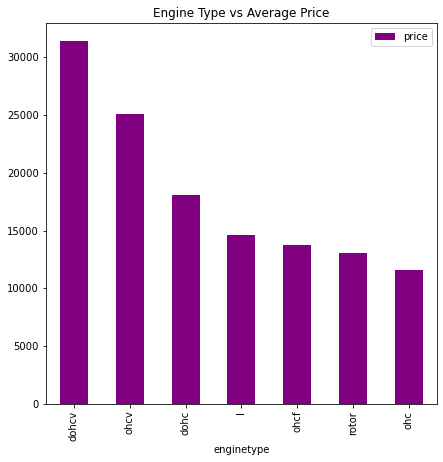

In [18]:
eng_type = pd.DataFrame(data.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
eng_type.plot.bar(figsize = (7,7), color = "purple")
plt.title('Engine Type vs Average Price')
plt.show()

<AxesSubplot:title={'center':'Engine Type Histogram'}, xlabel='count', ylabel='enginetype'>

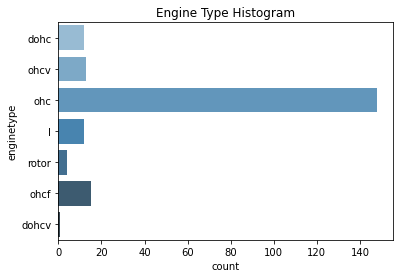

In [19]:
plt.title('Engine Type Histogram')
sns.countplot(y = data.enginetype, palette=("Blues_d"))

Inferences:

1. dbhcv engine is the most expensive engine type.
2. ohc is the most popular engine type and it is the least expensive as well.

Text(0.5, 1.0, 'Company VS Price')

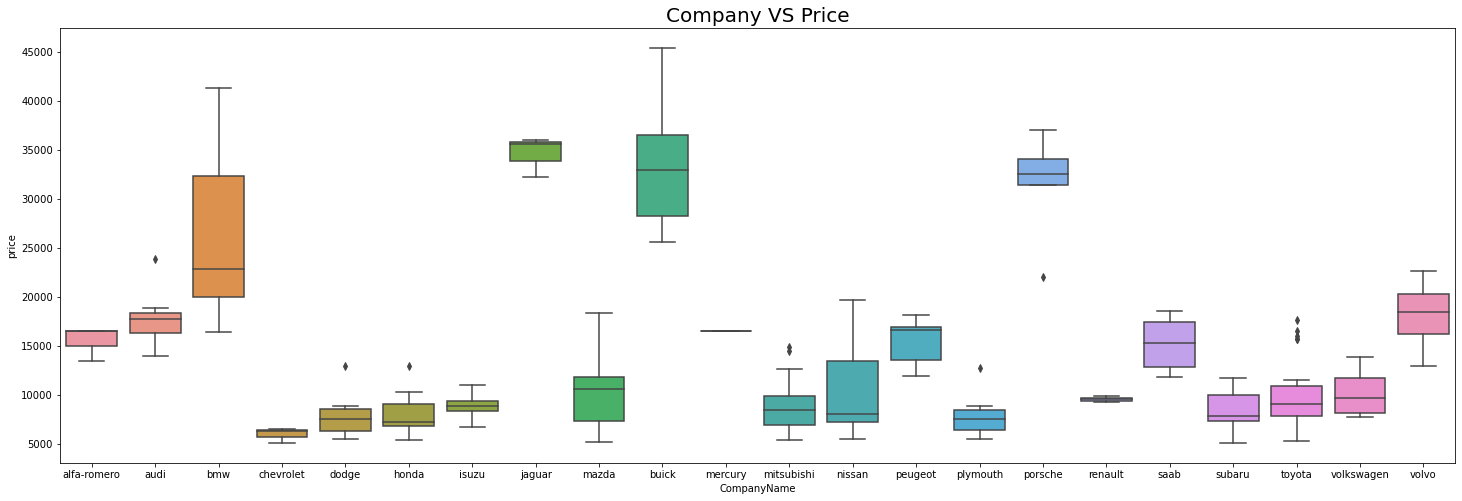

In [20]:
plt.figure(figsize = (25,8))
sns.boxplot(x = 'CompanyName', y = 'price', data = data)
plt.title('Company VS Price', fontsize = 20)

Text(0.5, 1.0, 'Company VS Average Price')

<Figure size 1080x720 with 0 Axes>

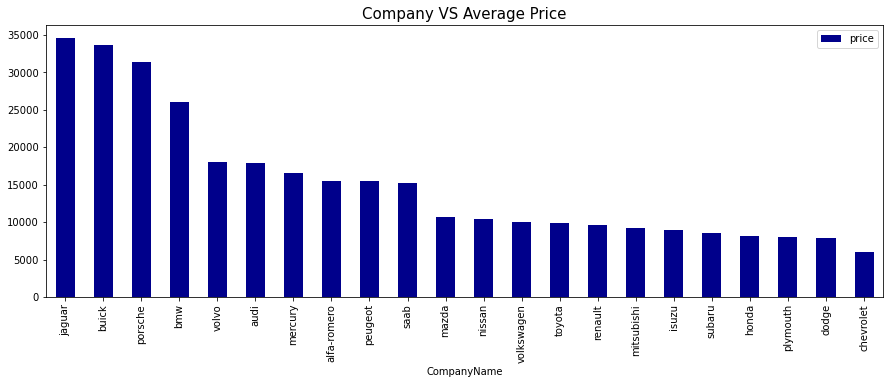

In [21]:
plt.figure(figsize = (15,10))
company_price = pd.DataFrame(data.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
company_price.plot.bar(figsize = (15,5), color = 'darkblue')
plt.title('Company VS Average Price',fontsize = 15)

Text(0.5, 1.0, 'Car Type VS Average Price')

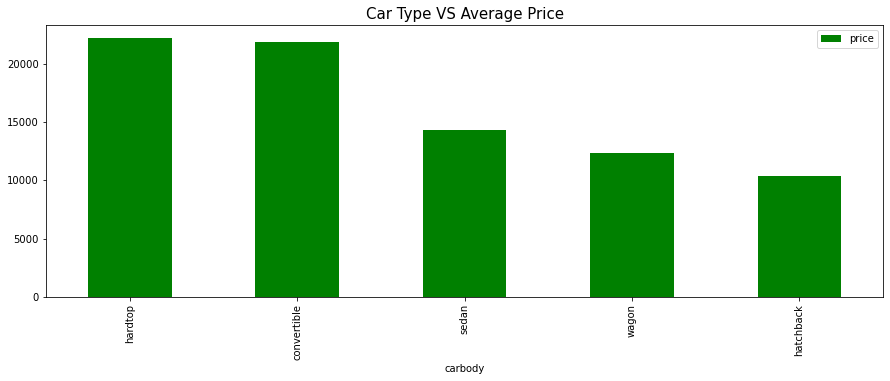

In [22]:
car_type = pd.DataFrame(data.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
car_type.plot.bar(figsize = (15,5), color = 'green')
plt.title('Car Type VS Average Price', fontsize = 15)

Inferences:

1. Jaguar seems to have the highest mean price.
2. BMW seems to have the widest price range, from 20,000 to 32,000, with mean being 26,000
3. Hardtops have the highest average price, followed closely by convertibles.
4. Hatchbacks are the least expensive among all.

<AxesSubplot:title={'center':'Aspiration VS Price'}, xlabel='aspiration', ylabel='price'>

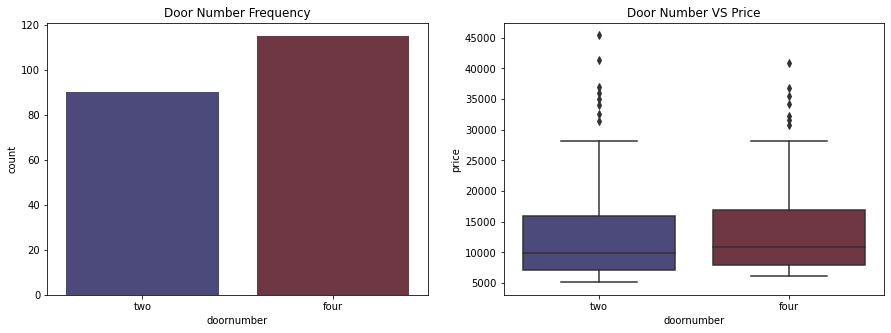

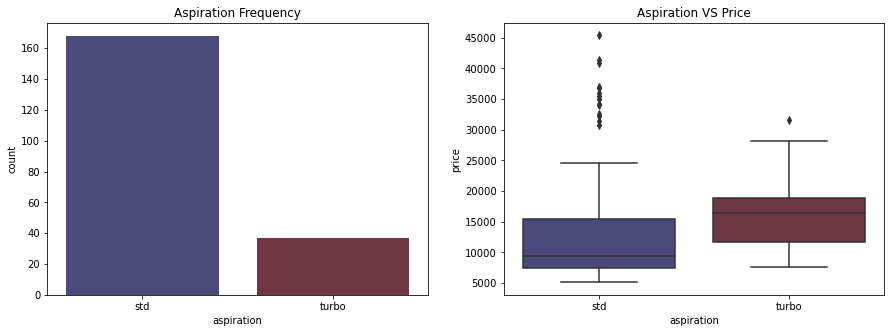

In [23]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Door Number Frequency')
sns.countplot(x = 'doornumber', data = data, palette = 'icefire')

plt.subplot(1,2,2)
plt.title('Door Number VS Price')
sns.boxplot(x = 'doornumber',y = 'price',data = data, palette = 'icefire')

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Frequency')
sns.countplot(x = 'aspiration', data = data, palette = 'icefire')

plt.subplot(1,2,2)
plt.title('Aspiration VS Price')
sns.boxplot(x = 'aspiration',y = 'price',data = data, palette = 'icefire')



Inferences:

1. More cars have 4 doors rather than 2.
2. Cars with 2 doors have a higher price range than cars with 4 doors but the mean is slightly lesser.
3. Std aspiration is the most popular.
4. Turbo aspiration has a higher mean price than std aspiration but std aspiration cars are priced much higher.

<AxesSubplot:title={'center':'Car Width VS Price'}, xlabel='carwidth', ylabel='price'>

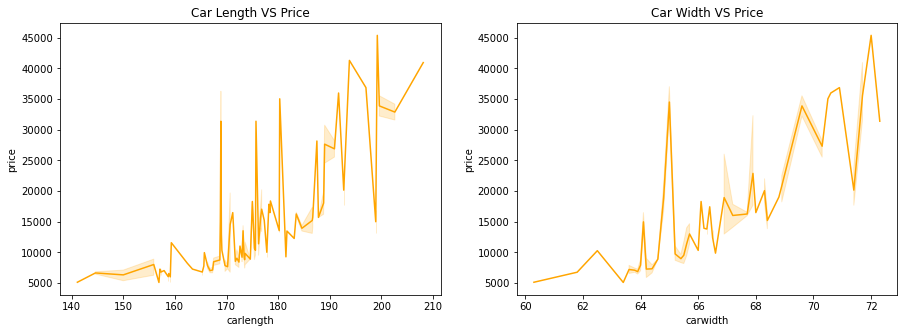

In [337]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Car Length VS Price')
sns.lineplot(x = 'carlength',y = 'price',data = data, color = 'orange')

plt.subplot(1,2,2)
plt.title('Car Width VS Price')
sns.lineplot(x ='carwidth', y = 'price', data = data, color = 'orange')


Inferences:

1. Cars with a length of 200 seem to be priced the highest
2. Cars with a width of 72 seem to be priced the highest

In [24]:
data.head(5)

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [25]:
data.drop('symboling', axis = 1, inplace = True)

In [26]:
data.head(5)

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Preprocessing

In [108]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [109]:
column = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CompanyName']

for i in column:
    data[i] = le.fit_transform(data[i])
    
data.head()    

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,0,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0,1,0,1,2,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,1,0,0,3,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,1,0,0,3,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [187]:
X= data.drop('price', axis=1)
y=data['price']        

## Prediction Model

In [266]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

In [189]:
X.shape

(205, 23)

In [190]:
y.shape

(205,)

In [203]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=55)

### Linear Regression

In [231]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_pred = lin_reg.predict(X_test)

print("Model\t\t\t R2 Score  \t\t RMSE \t\t\t MAE")
print("""Linear Regression \t {:.2f} \t\t\t {:.2f} \t\t {:.2f}""".format(r2_score(y_test, lin_reg_pred), np.sqrt(mean_squared_error(y_test, lin_reg_pred)), mean_absolute_error(y_test, lin_reg_pred)))

Model			 R2 Score  		 RMSE 			 MAE
Linear Regression 	 0.85 			 2972.65 		 1821.15


### Decision Tree Regressor

In [289]:
dt = DecisionTreeRegressor( criterion = "mse", splitter ="best", min_samples_leaf = 3, random_state = 42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("Model\t\t\t\t R2 Score  \t\t RMSE \t\t\t MAE")
print("""Decision Tree Regressor \t {:.2f} \t\t\t {:.2f} \t\t {:.2f}""".format(r2_score(y_test, dt_pred), np.sqrt(mean_squared_error(y_test, dt_pred)), mean_absolute_error(y_test, dt_pred)))


Model				 R2 Score  		 RMSE 			 MAE
Decision Tree Regressor 	 0.88 			 2687.13 		 1742.79


### Random Forest Regressor

In [313]:
rf = RandomForestRegressor(n_estimators = 120, max_depth = 15, criterion = "mse", min_samples_leaf = 2, random_state = 42, verbose = 1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Model\t\t\t\t R2 Score  \t\t RMSE \t\t\t MAE")
print("""Random Forest Regressor \t {:.2f} \t\t\t {:.2f} \t\t {:.2f}""".format(r2_score(y_test, rf_pred), np.sqrt(mean_squared_error(y_test, rf_pred)), mean_absolute_error(y_test, rf_pred)))

Model				 R2 Score  		 RMSE 			 MAE
Random Forest Regressor 	 0.93 			 2096.29 		 1524.40


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished


### K Neighbours Regressor

In [263]:
knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(X_train, y_train)
knr_pred = knr.predict(X_test)

print("Model\t\t\t\t R2 Score  \t\t RMSE \t\t\t MAE")
print("""K Neighbors Regressor \t\t {:.2f} \t\t\t {:.2f} \t\t {:.2f}""".format(r2_score(y_test, knr_pred), np.sqrt(mean_squared_error(y_test, knr_pred)), mean_absolute_error(y_test, knr_pred)))

Model				 R2 Score  		 RMSE 			 MAE
K Neighbors Regressor 		 0.70 			 4249.58 		 2685.01


### Support Vector Regressor

In [346]:
svr = SVR(kernel = 'linear', C = 1.0, epsilon = 0.1)
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

print("Model\t\t\t\t R2 Score  \t\t RMSE \t\t\t MAE")
print("""Support Vector Regressor \t {:.2f} \t\t\t {:.2f} \t\t {:.2f}""".format(r2_score(y_test, svr_pred), np.sqrt(mean_squared_error(y_test, svr_pred)), mean_absolute_error(y_test, svr_pred)))

Model				 R2 Score  		 RMSE 			 MAE
Support Vector Regressor 	 0.77 			 3657.99 		 2351.78


In [350]:
results = pd.DataFrame([
    {'Algorithm' : 'Linear Regression', 'R2 Score' : r2_score(y_test,lin_reg_pred), 'RMSE Score' : np.sqrt(mean_squared_error(y_test,lin_reg_pred)), 'MAE Score' :mean_absolute_error(y_test,lin_reg_pred)},
    {'Algorithm' : 'Decision Trees Regressor', 'R2 Score' : r2_score(y_test,dt_pred), 'RMSE Score' : np.sqrt(mean_squared_error(y_test,dt_pred)),'MAE Score' :mean_absolute_error(y_test,dt_pred)},
    {'Algorithm' : 'Random Forest Regressor', 'R2 Score' : r2_score(y_test,rf_pred), 'RMSE Score' : np.sqrt(mean_squared_error(y_test,rf_pred)),'MAE Score' :mean_absolute_error(y_test,rf_pred)},
    {'Algorithm' : 'KNeighborsRegressor', 'R2 Score' : r2_score(y_test,knr_pred), 'RMSE Score' : np.sqrt(mean_squared_error(y_test,knr_pred)),'MAE Score' :mean_absolute_error(y_test,knr_pred)},
    {'Algorithm' : 'Support Vector Regressor', 'R2 Score' : r2_score(y_test,svr_pred),'RMSE Score' : np.sqrt(mean_squared_error(y_test, svr_pred)),'MAE Score' :mean_absolute_error(y_test,svr_pred)}
])

results.sort_values(by=['R2 Score'], ascending=False)

,Algorithm,R2 Score,RMSE Score,MAE Score
2,Random Forest Regressor,0.925806,2096.291463,1524.400841
1,Decision Trees Regressor,0.878089,2687.127069,1742.793274
0,Linear Regression,0.850805,2972.649108,1821.151236
4,Support Vector Regressor,0.774082,3657.990565,2351.775342
3,KNeighborsRegressor,0.695099,4249.580936,2685.005371


Conclusions:

1. So far, Random Forest Regressor has given the highest R2 Score, and the model with the lowest R2 Score is K Neighbours Regressor.
2. Random Forest Regressor also has the lowest MAE Score.